In [7]:
# Import necessary libraries
import pandas as pd
import Common_Functions as cmn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Load the dataset conating YoY changes in the variables

In [8]:
df_change = pd.read_csv(cmn.PATH_df_no_NAN_99p_YoY).drop(columns="Unnamed: 0")

#  Function to binary classify rising and falling metrics

In [9]:
def prediction_int(df, feature):
    pred = ((df[feature] > 0).astype(int))
    return pred.astype(int)

In [10]:
# Selecting all YoY-change columns
feature_cols = df_change.filter(regex='Return|YoY').columns.tolist()

# Creating a copy of the imported dataframe, to store the binary values
df_change_binary = df_change.copy()

# Calling the function to perform binary classification on YoY columns
for feature in feature_cols:
    df_change_binary[f"{feature} Classified"] = prediction_int(df_change, feature)

# Defining the X and y for the Classifier

In [12]:
# Defining the features X
ESG_List = ['ESG Score',
            'ESG Combined Score',
            'ESG Controversies Score',
            'Social Pillar Score',
            'Governance Pillar Score',
            'ESG Score YoY change',
            'ESG Combined Score YoY change',
            'ESG Controversies Score YoY change',
            'Social Pillar Score YoY change',
            'Governance Pillar Score YoY change']

# Defining the targets y
Financials_List = [ 'Total Return Classified', 
                    'Return On Equity - Mean Classified',                    
                    'Revenue - Mean YoY change Classified',
                    'Earnings Per Share - Mean YoY change Classified',
                    'Company Market Cap YoY change Classified',
                    'EBITDA - Mean YoY change Classified']

# RandomForestClassifier
   - This function runs the RandomForestClassifier as well as get its Feature Importance, Precision, Recall, F1, Accuracy and Confusion Matrix. It returns a dictionary containing all of the previously listed metrics

In [13]:
# Function to run RandomForest on the new binary dataframe
def CustomClassifier(X, y_list):
   all_results = {}
   for y in y_list:
      result = {}      
      # Splitting training and testing data and introducing the RandomForest Classifier
      X_train, X_test, y_train, y_test = train_test_split(X, y_list[y], test_size = 0.20, random_state=42)
      rfc = RandomForestClassifier(n_estimators=100)

      # fit random forest classifier to training data
      rfc.fit(X_train, y_train)

      # make predictions on test data
      y_pred = rfc.predict(X_test)

      result['Importances'] = rfc.feature_importances_
      # calculate different metrics to assess the quality of the predictions
      result['Precision'] = precision_score(y_pred=y_pred, y_true=y_test)
      result['Recall'] = recall_score(y_pred=y_pred, y_true=y_test)
      result['F1'] = f1_score(y_pred=y_pred, y_true=y_test)
      result['Accuracy'] = accuracy_score(y_test, y_pred)
      result['Confusion'] = confusion_matrix(y_pred=y_pred, y_true=y_test)
      
      all_results[y] = result

   return all_results

# Run once to test and get show values for Precision, Recall, F1, Accuracy and Confusion Matrix

In [14]:
X = df_change_binary[ESG_List]
y_list = df_change_binary[Financials_List]

results = CustomClassifier(X, y_list)

for y in y_list:
    print(f'{y}')
    print('    Precision    : {0:1.5f}'.format(results[y]['Precision']))
    print('    Recall       : {0:1.5f}'.format(results[y]['Recall']))
    print('    F1           : {0:1.5f}'.format(results[y]['F1']))
    print('    Accuracy     : {0:1.5f}'.format(results[y]['Accuracy']))
    print('    Confusion    :')
    print(f"                  {results[y]['Confusion']}")
    print('    Importances    :')
    print(f"                  {results[y]['Importances']}")

Total Return Classified
    Precision    : 0.62451
    Recall       : 0.87051
    F1           : 0.72727
    Accuracy     : 0.59413
    Confusion    :
                  [[ 439 2696]
 [ 667 4484]]
    Importances    :
                  [0.10879436 0.10887693 0.02125097 0.12668757 0.12688631 0.11020468
 0.10948584 0.03657306 0.12734663 0.12389365]
Return On Equity - Mean Classified
    Precision    : 0.92684
    Recall       : 0.99987
    F1           : 0.96197
    Accuracy     : 0.92674
    Confusion    :
                  [[   2  606]
 [   1 7677]]
    Importances    :
                  [0.11445998 0.1165382  0.02342943 0.12936475 0.12372279 0.1099095
 0.10915286 0.03546638 0.11734611 0.12061   ]
Revenue - Mean YoY change Classified
    Precision    : 0.71262
    Recall       : 0.96315
    F1           : 0.81915
    Accuracy     : 0.69780
    Confusion    :
                  [[ 111 2287]
 [ 217 5671]]
    Importances    :
                  [0.11151212 0.10913747 0.02355426 0.12572206 0

# Run once to test and get show values for Feature Importance as well as sort the importance values by highest to lowest score

In [15]:
for y in y_list:
    print(f'{y} Importances    :')
    sorted_idx = results[y]['Importances'].argsort()[::-1]
    
    for i in range(len(results[y]['Importances'])):
        print(f"    {ESG_List[sorted_idx[i]]} --- {results[y]['Importances'][sorted_idx[i]]}")

Total Return Classified Importances    :
    Social Pillar Score YoY change --- 0.12734662589357287
    Governance Pillar Score --- 0.12688631340844334
    Social Pillar Score --- 0.12668757012139548
    Governance Pillar Score YoY change --- 0.12389365037319659
    ESG Score YoY change --- 0.11020468465442254
    ESG Combined Score YoY change --- 0.10948583558322417
    ESG Combined Score --- 0.10887693298368001
    ESG Score --- 0.10879435599739931
    ESG Controversies Score YoY change --- 0.036573056151486615
    ESG Controversies Score --- 0.021250974833179177
Return On Equity - Mean Classified Importances    :
    Social Pillar Score --- 0.12936474798309988
    Governance Pillar Score --- 0.12372278647548977
    Governance Pillar Score YoY change --- 0.12061000247201033
    Social Pillar Score YoY change --- 0.11734610819084347
    ESG Combined Score --- 0.11653820295351588
    ESG Score --- 0.11445998196214491
    ESG Score YoY change --- 0.10990949981204264
    ESG Combined Sco

# Function to display the Confusion Matrix as a heatmap

In [16]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt. xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
       
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

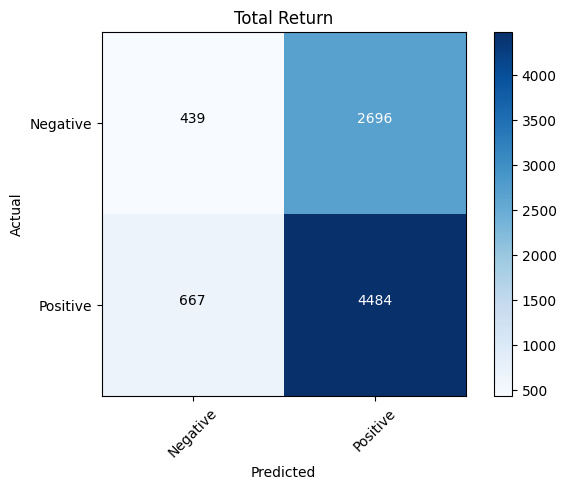

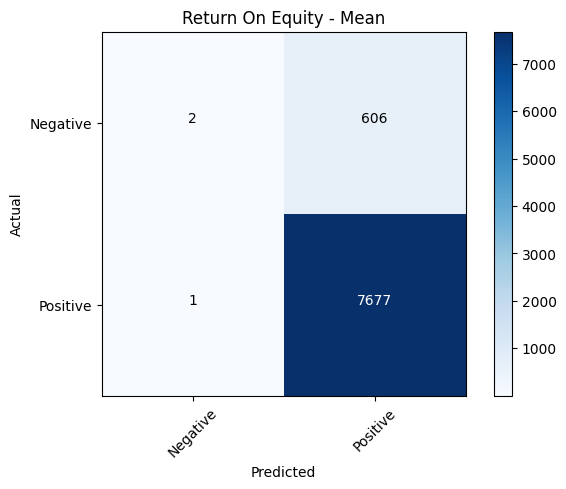

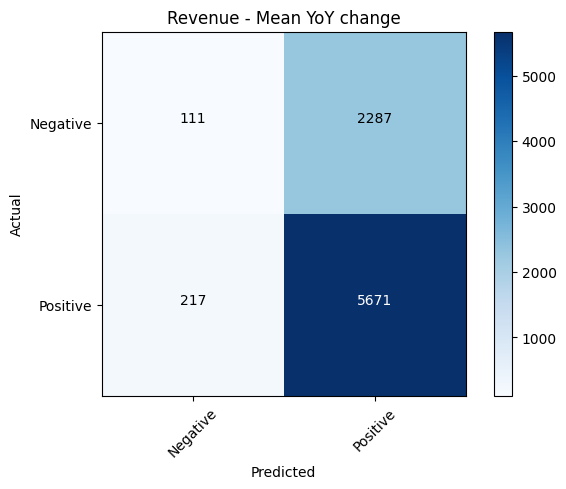

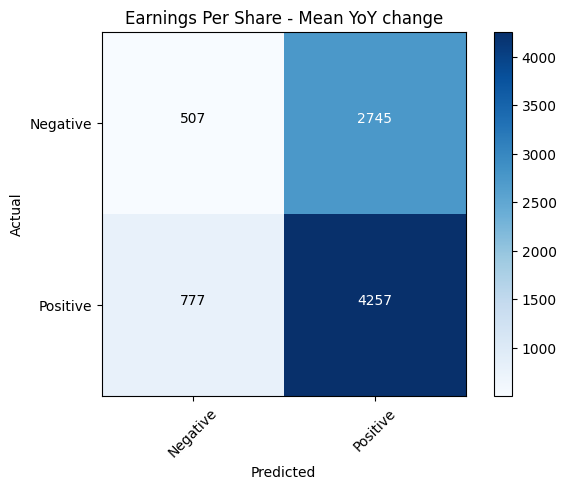

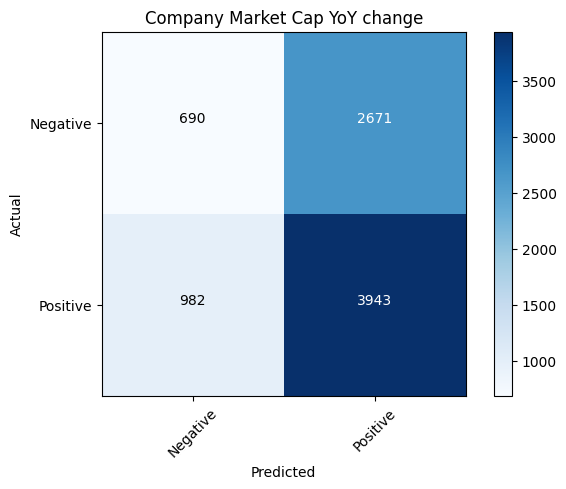

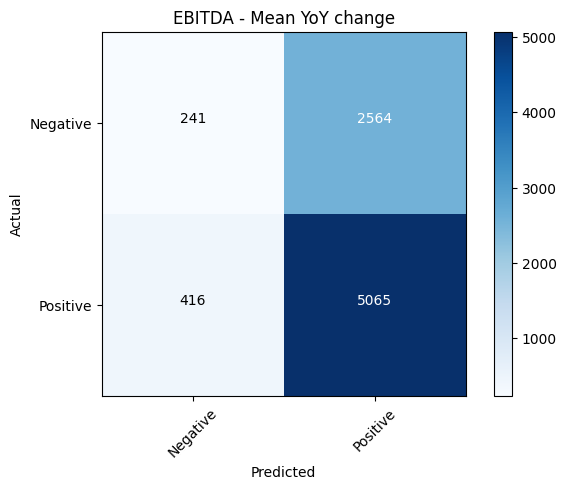

In [17]:
Fin_List = [ 'Total Return', 
                    'Return On Equity - Mean',                    
                    'Revenue - Mean YoY change',
                    'Earnings Per Share - Mean YoY change',
                    'Company Market Cap YoY change',
                    'EBITDA - Mean YoY change']

for y in y_list:
    cm_plot_labels = ['Negative', 'Positive']
    cm = results[y]['Confusion']
    plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title=y.replace(" Classified", ""))

# collateResultData()
- A function that Run the CustomClassifier function N times to get and store the data from CustomClassifier per iteration
- (TBA add reason to run N times here)

In [147]:
result_idx_list = ['Precision', 'Recall', 'F1', 'Accuracy']
def collateResultData(n_iterations, Financials_List_To_Test, df):
    X = df[ESG_List]
    y_list = df[Financials_List_To_Test]

    iteration_results = {}

    for iter in range(1, n_iterations + 1):    
        results = CustomClassifier(X, y_list)    
        for y in y_list:
            if y not in iteration_results:
                iteration_results[y] = {}
            for idx in result_idx_list:
                ave_idx_name = f'{idx} Ave'
                if idx not in iteration_results[y]:
                    iteration_results[y][idx] = []   
                if ave_idx_name not in iteration_results[y]:
                    iteration_results[y][ave_idx_name] = []   
                    #print(type(iteration_results[y][ave_idx_name]))
                    category_sum = 0
                else:
                    category_sum = sum(iteration_results[y][ave_idx_name])


                #print(f"{iter} - {idx} - {category_sum} - {results[y][idx]}")
                iteration_results[y][idx].append(results[y][idx])
                iteration_results[y][ave_idx_name].append((results[y][idx] + category_sum) / iter)
            
            if "Confusion" not in iteration_results[y]:
                iteration_results[y]["Confusion"] = [] 
            else:  
                iteration_results[y]["Confusion"].append(results[y]["Confusion"])
            
            if "Importances" not in iteration_results[y]:
                iteration_results[y]["Importances"] = [] 
            else:  
                iteration_results[y]["Importances"].append(results[y]["Importances"])
    
    return iteration_results

In [148]:
result_idx_list = ['Precision', 'Recall', 'F1', 'Accuracy']
Financials_List_To_Test = [ 'Total Return Classified',                     
                            'Revenue - Mean YoY change Classified',
                            'Earnings Per Share - Mean YoY change Classified',
                            'Company Market Cap YoY change Classified',
                            'EBITDA - Mean YoY change Classified']

In [149]:
n_iterations = 100
iteration_results = collateResultData(n_iterations, Financials_List_To_Test, df_change_binary)

In [151]:
import pickle
# Define the filename to save the dictionary as
filename = 'iteration_results.pkl'

# Use pickle to dump the dictionary to a binary file
with open(filename, 'wb') as f:
    pickle.dump(iteration_results, f)

# Use pickle to reload the dictionary from the binary file
#with open(filename, 'rb') as f:
#    iteration_results2 = pickle.load(f)

In [152]:
def displaAndPlotAllData():
    for y in Financials_List_To_Test:
        print(f'{y}')
        for idx in result_idx_list:
            fig, ax = plt.subplots()
            print(f"{idx} : {iteration_results[y][f'{idx}']}")
            print(f"{idx} Ave : {iteration_results[y][f'{idx} Ave']}")
            x_values = range(1, len(iteration_results[y][f'{idx} Ave']) + 1)
            ax.plot(x_values, iteration_results[y][f'{idx} Ave'])
            ax.set_title(f'{idx} Ave') 
        plt.show()

Total Return Classified
Precision : [0.6234146341463415, 0.6242382271468144, 0.6251740462266778, 0.6232326032714167, 0.6257685858021241, 0.6216065710705834, 0.6239933351846709, 0.6288630960704796, 0.625, 0.6222561822728536, 0.6238187882156754, 0.6218850062647918, 0.6218312785704391, 0.6233532103730411, 0.6233983286908078, 0.6240916713247624, 0.6266870738834006, 0.6222841225626741, 0.6228412256267409, 0.62418617537055, 0.6263751566634174, 0.625522429646141, 0.6231683715786563, 0.6244608320578823, 0.6251040221914008, 0.6225442385397798, 0.624233983286908, 0.6234292097179559, 0.6257277515941225, 0.6244287494806814, 0.6248600223964166, 0.6232752613240418, 0.6246342482931587, 0.6244614315496873, 0.6237199003598118, 0.6238634774094279, 0.6210774784782005, 0.6217348791730689, 0.6256975446428571, 0.622444722569879, 0.6255201109570042, 0.6224348308374931, 0.6244743481917577, 0.6234438382990628, 0.6223581757508343, 0.6239831697054699, 0.6211784324624792, 0.6235179243967081, 0.6190080354668883, 0

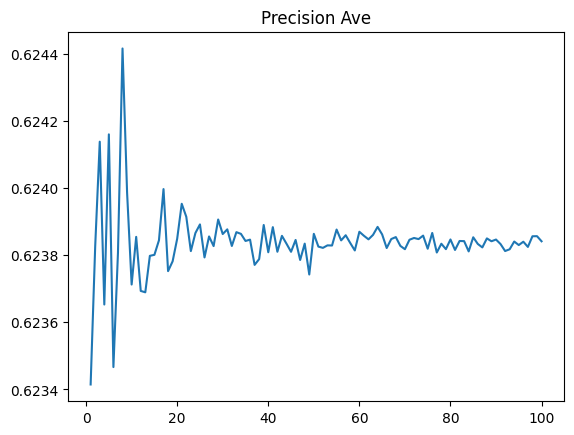

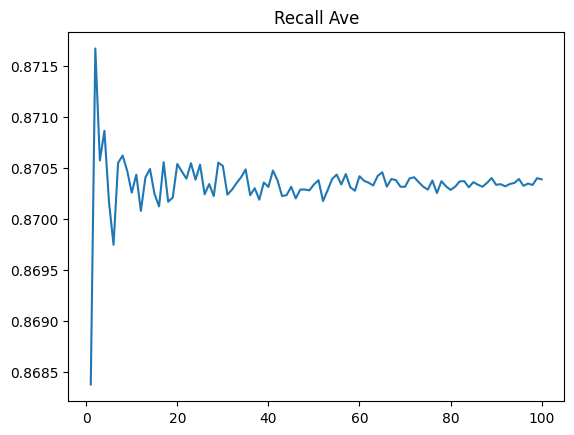

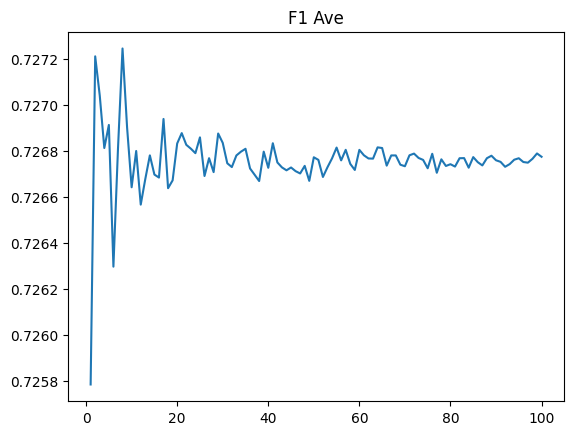

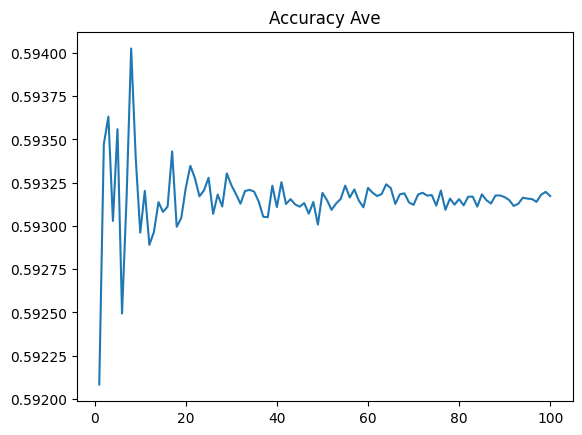

Return On Equity - Mean Classified
Precision : [0.9268469338483825, 0.9266143633071816, 0.926605504587156, 0.9267262192177692, 0.9269500120743782, 0.9267350633675316, 0.9269588313413014, 0.9269588313413014, 0.9268469338483825, 0.9267173729325123, 0.9268381021369069, 0.9267350633675316, 0.926829268292683, 0.9267262192177692, 0.9266232198889693, 0.9267262192177692, 0.9268469338483825, 0.9268381021369069, 0.9267262192177692, 0.9268381021369069, 0.9269500120743782, 0.9267350633675316, 0.9267350633675316, 0.9268469338483825, 0.9267262192177692, 0.9268381021369069, 0.9267350633675316, 0.9267350633675316, 0.9266232198889693, 0.9268381021369069, 0.9269500120743782, 0.9267350633675316, 0.9267262192177692, 0.9267350633675316, 0.9269588313413014, 0.9267173729325123, 0.9267350633675316, 0.9267262192177692, 0.9267350633675316, 0.9267262192177692, 0.9267350633675316, 0.926829268292683, 0.9267350633675316, 0.9268469338483825, 0.927061949039971, 0.9267350633675316, 0.9267262192177692, 0.92662321988896

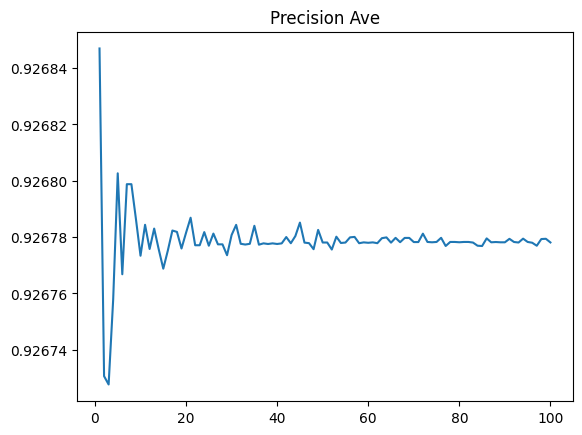

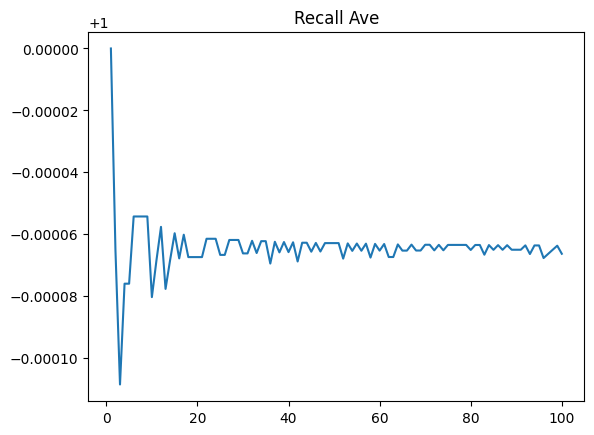

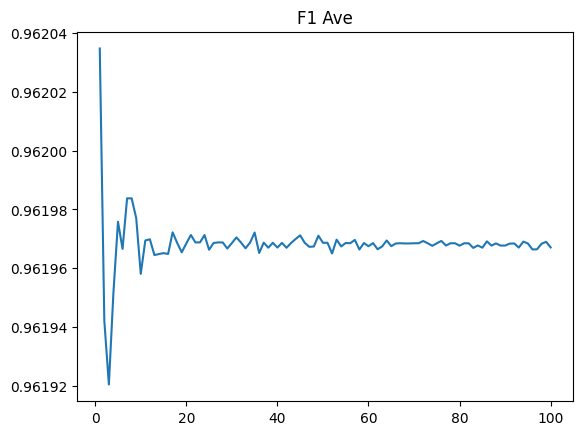

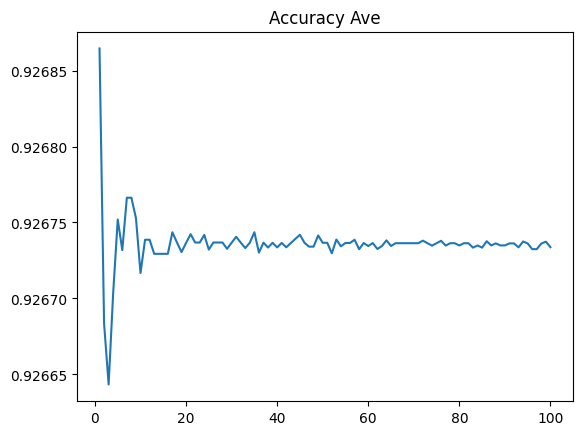

Revenue - Mean YoY change Classified
Precision : [0.71527428283845, 0.7124685138539043, 0.713565305093293, 0.7121803753621363, 0.7146270909319582, 0.7137091688737546, 0.711485297813521, 0.7123804730749874, 0.7129559748427673, 0.713226049786271, 0.7127793120763244, 0.7126696832579186, 0.7140522875816994, 0.7128825085001889, 0.712788789294281, 0.7128101776042323, 0.7126291908243004, 0.7139435199193142, 0.7130281690140845, 0.7141061101332663, 0.7139979859013091, 0.7126306510515048, 0.7133870156014092, 0.7139250094685015, 0.7128825085001889, 0.7128812704814721, 0.7133333333333334, 0.7131539235412475, 0.7132990079115911, 0.7123771111671288, 0.7132213663341331, 0.7135855221817268, 0.7130016457779466, 0.7138182733450793, 0.7145383352279904, 0.7126668345504911, 0.7144115796098175, 0.7149338374291115, 0.7122890959456056, 0.7126856279889252, 0.7134753561073994, 0.7129385137683892, 0.7131714681091961, 0.7124512149062068, 0.7130445731553765, 0.7130106851037084, 0.7131695022054191, 0.71371018506861

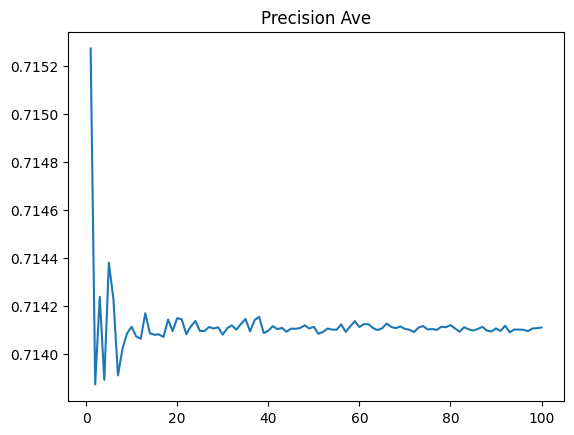

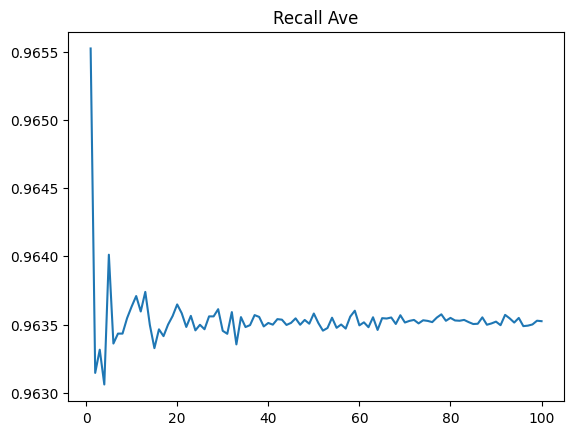

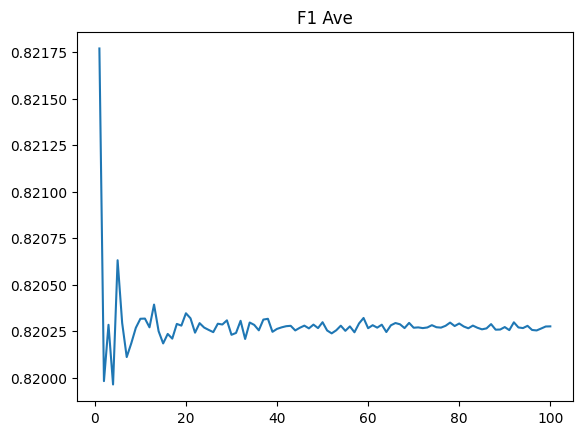

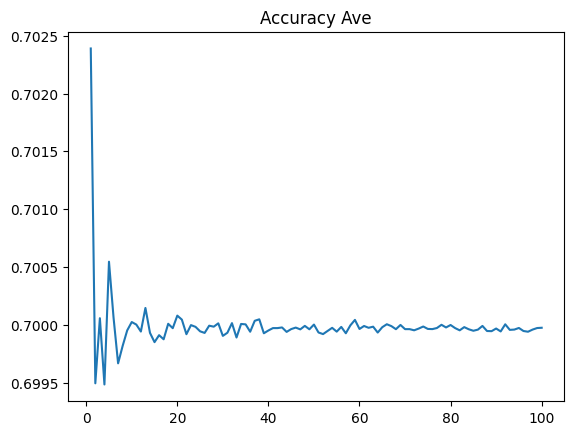

Earnings Per Share - Mean YoY change Classified
Precision : [0.6092923516797712, 0.6113038450419196, 0.6069787478460654, 0.6098501070663812, 0.6105520414031053, 0.6082606831499214, 0.6113960113960114, 0.6070100143061516, 0.6115451388888888, 0.6096264367816092, 0.6059564719358533, 0.6095360824742269, 0.6085332567159891, 0.6085143103696247, 0.6096723422521104, 0.6075330649798735, 0.6094198736358415, 0.6103225806451613, 0.6056863871338312, 0.6095017381228274, 0.6084105488239486, 0.604691322492445, 0.6073523101130024, 0.6072090041316427, 0.6058908045977012, 0.6089080459770115, 0.6090214728347024, 0.6092135476463835, 0.6114401271125235, 0.6109757844963462, 0.610718916582625, 0.609397315052842, 0.6092915885153658, 0.6078882971066647, 0.6069055186362323, 0.6109991361934927, 0.6078262120558193, 0.6074699484831139, 0.6084216556860499, 0.6098014002000286, 0.6074766355140186, 0.6061776061776062, 0.6081293831401173, 0.6093884582256676, 0.6091312437383712, 0.6085271317829457, 0.6098544878259616, 0.

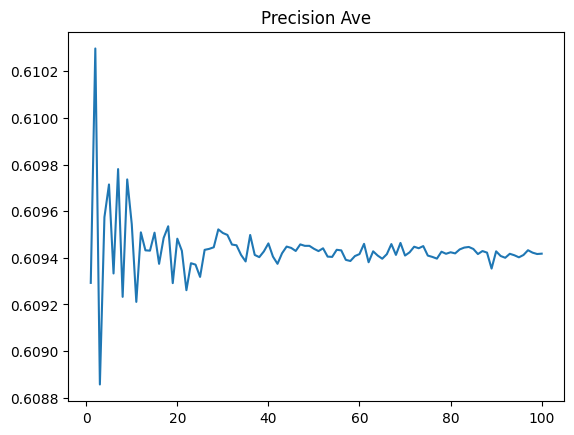

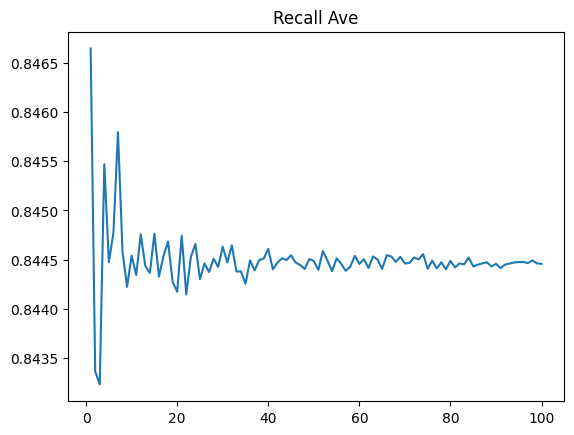

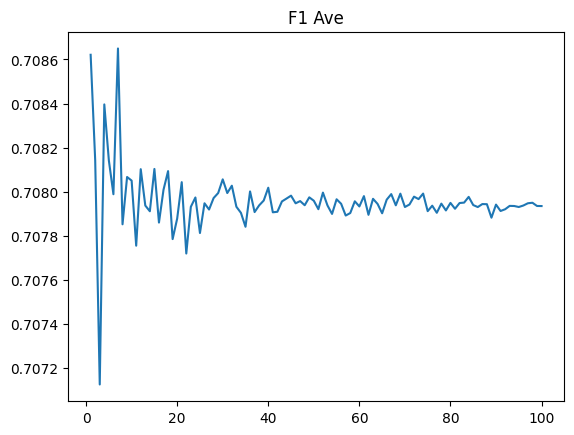

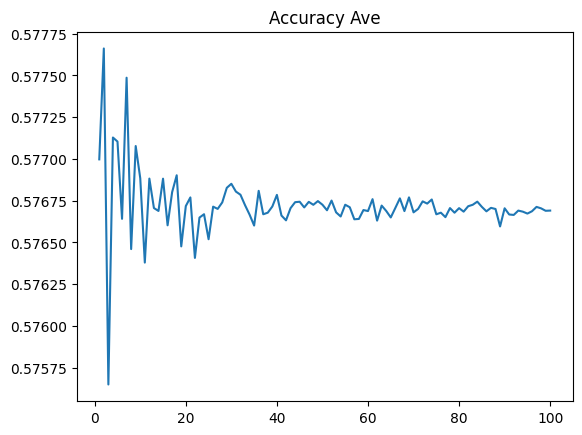

Company Market Cap YoY change Classified
Precision : [0.6027689030883919, 0.598825831702544, 0.5960205004522159, 0.6020966271649955, 0.5971635485817743, 0.5976186841703557, 0.5955124317768344, 0.596745027124774, 0.5986373959121878, 0.5965968980575215, 0.5955158309347068, 0.5972581873571973, 0.5985776970797397, 0.600302343159486, 0.5919045461410664, 0.5983035443804907, 0.5979490272960338, 0.5985830569791981, 0.6015400875736071, 0.5982142857142857, 0.5968451387835583, 0.5981534735886181, 0.599005424954792, 0.596475372797108, 0.5979739945570003, 0.5979100408905044, 0.5990846681922197, 0.600999394306481, 0.5970668279407317, 0.5990227515651244, 0.5972706595905989, 0.5976484959535807, 0.5961132871346791, 0.5935180978343177, 0.5971233913701741, 0.5979709267110842, 0.5990359993974996, 0.6005760194027588, 0.600152207001522, 0.5961422543701025, 0.6011877569666514, 0.5955140749661297, 0.5951593505712568, 0.5961654589371981, 0.5983631403455593, 0.5966666666666667, 0.5994558645707376, 0.59651269501

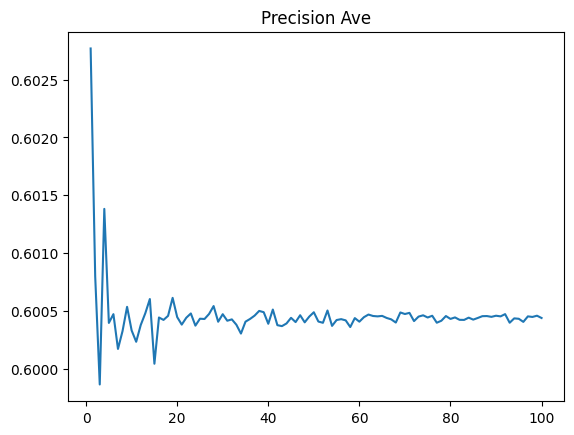

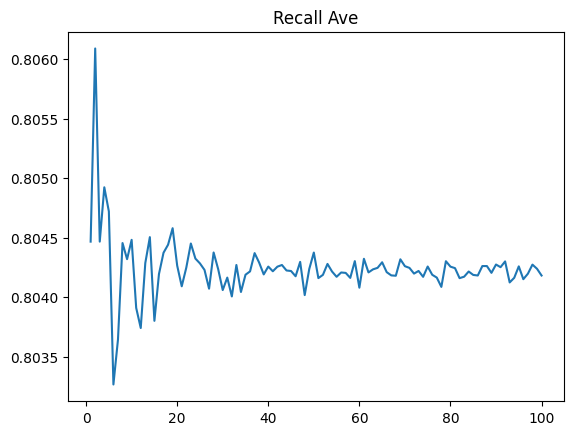

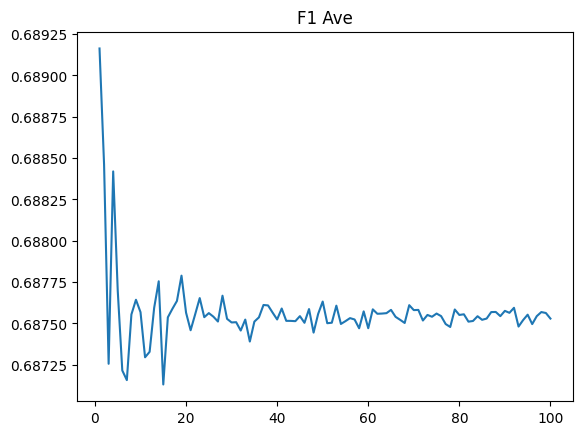

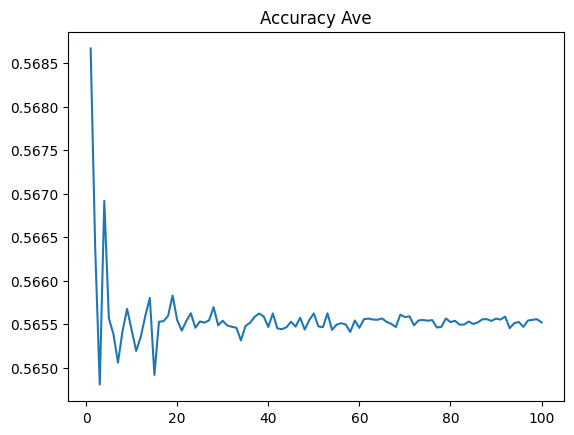

EBITDA - Mean YoY change Classified
Precision : [0.6633080345459303, 0.6625638339662171, 0.6605648535564853, 0.6626127893291487, 0.6613915772953178, 0.6640388910787018, 0.6641331411348447, 0.6622715404699739, 0.6616227498043308, 0.6623002357872675, 0.6621392190152802, 0.6620698712897295, 0.6610036591740721, 0.6639601885804086, 0.6612292835704032, 0.6640083671068113, 0.662128550857442, 0.6611343439623628, 0.6615666274355957, 0.660996990710454, 0.6659251504841665, 0.6625147502294481, 0.663530641578466, 0.663408913213448, 0.663570961412688, 0.6620734908136483, 0.6650091599057838, 0.6620327868852459, 0.6616876310272537, 0.6628302380329584, 0.6623819517313746, 0.660996990710454, 0.6627327563598217, 0.6632226000523149, 0.6630463229521067, 0.6616393442622951, 0.663225300575013, 0.6618723849372385, 0.6625277741471703, 0.6632049428158275, 0.6628242074927954, 0.6619332985930172, 0.6621621621621622, 0.6621639344262296, 0.6624004179182448, 0.6633080345459303, 0.6620581713838529, 0.6631317098716941

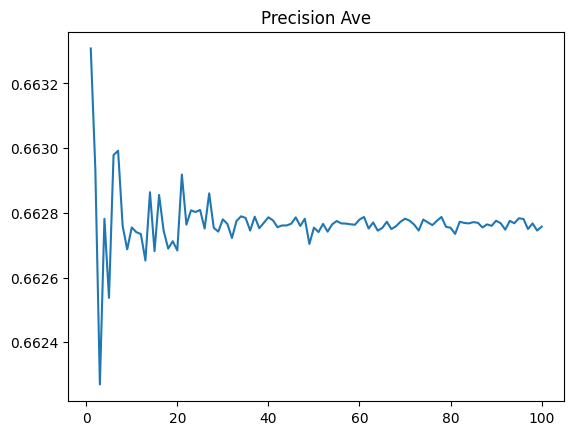

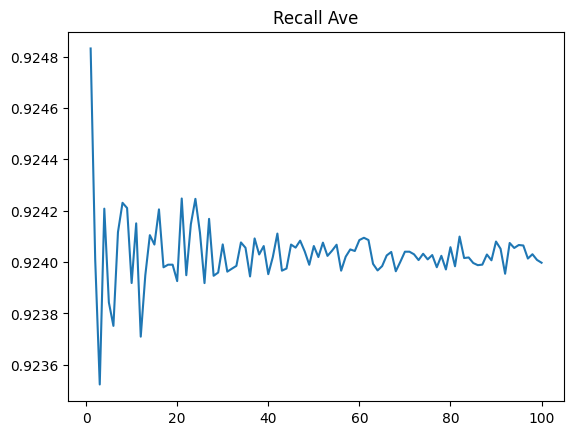

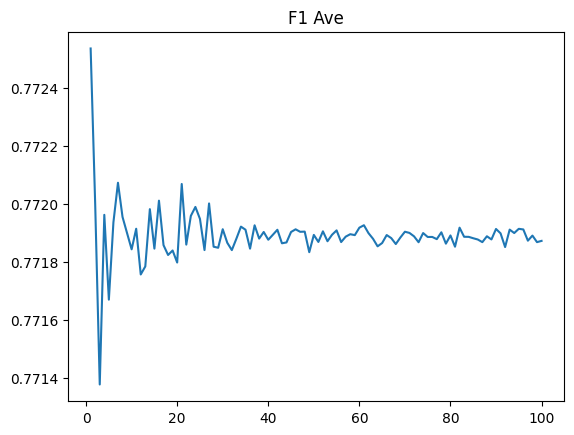

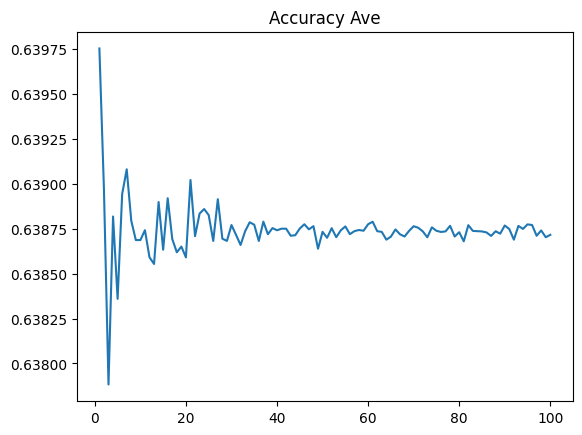

In [91]:
displaAndPlotAllData()